# Homework 3

## Andrew Loeppky

## P509, Fall '21

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.special import perm

from IPython.display import clear_output
import random

### Question 1 

Consider an (unnormalized) Cauchy distribution with mean a and width parameter $b$:

$$
f(x|a,b ) = \left(1 + \left(\frac{x-a}{b}\right)^2\right)^{-1}
$$

In this problem you will use Monte Carlo simulation to explore ways of estimating the model parameters from a data sample drawn from this underlying distribution.

**A.** Write a simulation that generates random numbers drawing from the above distribution. Briefly describe the method your routine uses. Show a plot of the output of your routine for 10000 simulated events, setting $a=0$ and $b=1$. Make the plot over the range -10 to 10, and superimpose a Cauchy distribution curve on top of the distribution to see if it agrees. (For the remainder of this problem you may take $a=0$ and $b=1$.)

---

I chose a brute force accept/reject method, generating a uniform distribution of x values over a range large enough that events are sufficiently rare at the edges of the distribution.

1) Generate uniform distributions on $x =rand[\pm10^5]$ and $y=rand[0,1]$

2) If y < x, accept the point. if not, reject it. This is done in large "chunks" to save computation time, and the final array is then truncated to the desired length.

In [9]:
def simulate_cauchy(xmin=-10., xmax=10., n_pts=1000, a=0, b=1, use_seed=False, show_plot=False):
    """
    Generates a cauchy distribution described by
    
    $$
    f(x|a,b ) = \left(1 + \left(\frac{x-a}{b}\right)^2\right)^{-1}
    $$
    
    Inputs:
    
        n_pts -- (int) number of points to generate
        xmin  -- (float) left edge of x domain
        xmax  -- (float) right edge of x domain
        a, b  -- (float) mean and width params of cauchy distn
        use_seed -- (bool) pin random number generator to seed
        show_plot  -- (bool) whether to graphically show output or not
    
    Returns:
    
        Some cool plots and an array x of length n_pts, cauchy distributed
    """
    # calculate the exact soln and initialize a 
    x_ext = np.linspace(xmin, xmax, 10000)
    x_sim = np.array([])
    y_sim = np.array([])
    beta = 1000 # how much to stretch the envelope function 
    chunksize = 10000 * n_pts # how big of chunks to calculate at once

    def do_cauchy(x, a=0, b=1):
        """
        calculates cauchy distn of x, a, b
        """
        y = (1 + ((x - a) / b) ** 2) ** -1
        return y
        
    if use_seed:
        random.seed(41)
    def get_xy(ymin, ymax, chunksize=chunksize):
        """
        outputs a random pair x, y, with x on 
        [-1e5, 1e5] and y on [ymin, ymax]
        """
        x = np.random.uniform(-100000,100000, size=chunksize)
        y = np.random.uniform(0,1, size=chunksize)
        
        return x, y

    # generate a plot of analytical distn and random numbers
    if show_plot:
        fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))
        #ax1.plot(x_ext, do_envelope(x_ext), color="k", linestyle=":", label="Envelope")
        ax1.plot(x_ext, do_cauchy(x_ext), color='k', label="Cauchy")
        ax1.legend()
        ax1.set_xlabel("x")
        ax1.set_xlim(xmin, xmax)
        #ax1.set_ylim(0, 0.01) ####### take this out for the real version
        ax1.set_title("Exact Solution and Simulated Points")
       
        ax2.set_xlabel("x")
        ax2.set_xlim(xmin, xmax)
        ax2.set_title("Histogram of Generated Values X")

    # do the sim, one "chunk" at a time
    while len(x_sim) < n_pts:
        x, y = get_xy(0,1)
        if show_plot:
            clear_output()
            print(f"Simulated {len(x_sim)}/{n_pts} points")
        
        # multiply both sides by a large number to get better numerical precision
        #large_number = 1e5
        x_sim = np.append(x_sim, x[do_cauchy(x) >= y])
        y_sim = np.append(y_sim, y[do_cauchy(x) >= y])
        
    # "trim" the output array to desired size        
    x_sim = x_sim[:n_pts]
    y_sim = y_sim[:n_pts]
    
    if show_plot:
        ax1.scatter(x_sim, y_sim)
        ax2.hist(x_sim[(x_sim > xmin) & (x_sim < xmax)], bins=30)
        print(f"Simulated {len(x_sim)}/{n_pts} points")
        
    return x_sim

Simulated 9503/10000 points
Simulated 10000/10000 points


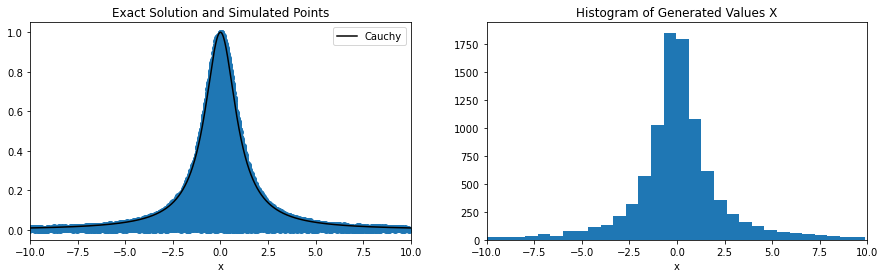

In [3]:
# do what is asked in Q1a
x = simulate_cauchy(n_pts=10000, show_plot=True)

**B.** An obvious estimator for the parameter $a$ is to calculate the mean of $N$ values. Suppose we draw 25 numbers from this distribution, and calculate their mean, which we'll denote by $x_{25}$. Simulate the distribution of $x_{25}$ for 10000 trials of this experiment, and plot the result 

In [159]:
# draw 25 samples x and take their mean, 10000 times
ntrials = 10000
x25 = np.array([np.mean(simulate_cauchy(n_pts=25)) for i in range(ntrials)])

Var of x25: 2510.1185707444215


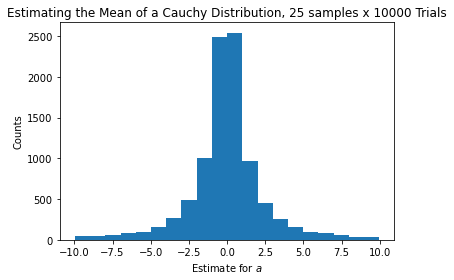

In [160]:
# histogram of x25
plt.hist(x25[(x25 > -10) & (x25 < 10)], bins=20)
plt.title(f"Estimating the Mean of a Cauchy Distribution, 25 samples x {ntrials} Trials")
plt.xlabel("Estimate for $a$")
plt.ylabel("Counts");
print(f"Var of x25: {np.var(x25)}")

**C.** Redo part B, but this time we'll estimate parameter a by averaging 100 samples. How does the width of the distribution for $x_{100}$ compare to that for $x_{25}$?

In [245]:
# draw 100 samples of x and take their mean, 10000 times
x100 = np.array([np.mean(simulate_cauchy(n_pts=100)) for i in range(ntrials)])

Var of x100: 1204.1621708662049


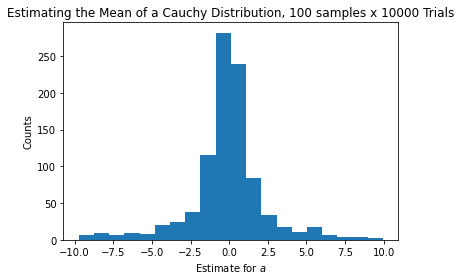

In [246]:
# plot x100
plt.hist(x100[(x100 > -10) & (x100 < 10)], bins=20)
plt.title(f"Estimating the Mean of a Cauchy Distribution, 100 samples x {ntrials} Trials")
plt.xlabel("Estimate for $a$")
plt.ylabel("Counts")
print(f"Var of x100: {np.var(x100)}")

*The variances generated by my numerical simulation are effectively random numbers, different each time I run it. Cauchy distributions have infinite variance, so averages of Cauchy random variables won't converge*

**D.** Develop a better estimator of $a$ (i.e. develop some function or algorithm of the 100 data points that yields a distribution for your estimate of parameter a with a smaller variance than $x_{100}$ does). Describe your method and show the simulated distribution of your new estimator. Is the method unbiased? Is it consistent?

*Rather than taking the mean of $x_{100}$, let's instead take the median. Medians are more tolerant of outliers, and should do a better job of ignoring events near the edges where we are likely to see larger fluctuations due to the rarity of numbers being drawn there.*

Var of xmed: 0.025373793721734924


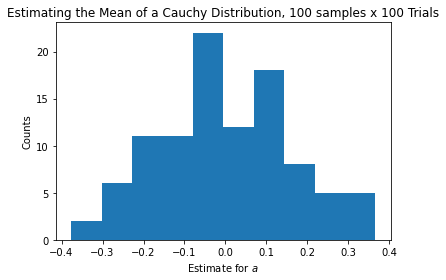

In [158]:
xmed = np.zeros(ntrials)
for i in range(ntrials):
    distn = simulate_cauchy(n_pts=100)
    xmed[i]= np.median(distn)

plt.hist(xmed)
plt.title(f"Estimating the Mean of a Cauchy Distribution, 100 samples x {ntrials} Trials")
plt.xlabel("Estimate for $a$")
plt.ylabel("Counts")
print(f"Var of xmed: {np.var(xmed)}")

**Is my estimator unbiased?** *Yes. As long as I trust my RNG, the median has equal chance of over or underestimating the true value of $a$*

**Is my estimator consistent?** *Run the simulation 5 times, increasing $N$ by a factor of 2 each time. A consistent estimator should converge on the true value $a=0$ with smaller standard deviations for large $N$*

In [10]:
for ntrials in np.array([10,20,40,80,160]):
    xmed = np.zeros(ntrials)
    print(f"N = {ntrials}")
    for i in range(ntrials):
        distn = simulate_cauchy(n_pts=25)
        xmed[i]= np.median(distn)
    print(f"Mean estimate of a:    {np.mean(xmed)}")
    print(f"Var of a estimate:     {np.var(xmed)}\n")

N = 10
Mean estimate of a:    0.11958098995237379
Var of a estimate:     0.050617531287125074

N = 20
Mean estimate of a:    0.024440947309631155
Var of a estimate:     0.17029224885810645

N = 40
Mean estimate of a:    0.04226794126334425
Var of a estimate:     0.06122790994410758

N = 80
Mean estimate of a:    -0.03557821716149192
Var of a estimate:     0.08837239624054938

N = 160
Mean estimate of a:    -0.0019238289368331608
Var of a estimate:     0.126579318965653



*My estimator is not **consistent** as per Barlow's definition. Changes in the variance of my estimate are only due to random fluctiations of the RNG. It is still a better estimator than the mean though.*

**E.** Develop a useful estimator for $b$. Describe your method and show the simulated distribution of your new estimator. Is your estimator consistent? Is it unbiased? How efficient do you think it is?

*Maximum of a cauchy occurs at $x-a = 0$, where $f(x|a,b)=1$. Calculate the value of b at full-width-half-max:*

$$
\frac{1}{2} = \left[1 + \left(\frac{x-a}{b}\right)^2\right]^{-1}
$$

$$
\left(\frac{x-a}{b}\right)^2 = 2 - 1
$$

$$
\pm (x - a) = b
$$

In [155]:
# first use my median estimator for a
dist = simulate_cauchy(n_pts=10000)
a = np.median(dist)

Value of a from med:    -0.012725325635983609
Value of b from FWHM:   0.8127253256359837


(0.0, 100.0)

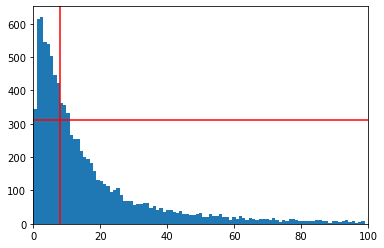

In [173]:
# bin the data at width 0.1 
# (needs to be type=int so multiply by 10 to preserve resolution)
dist_bin = (np.round(dist * 10)).astype(int)

# take absolute value, folding the distn over the y axis
dist_bin = np.abs(dist_bin)

# count the number of occurences of each element
counts = np.bincount(dist_bin)

# find the maximum
the_max = np.max(counts)

# figure out where the distn is nearest to half the max
x_FWHM = dist_bin[np.argmin((counts - the_max / 2))]

# calculate b = x - a
b =(x_FWHM / 10) - a
print(f"""Value of a from med:    {a}
Value of b from FWHM:   {b}""")

# note: the automated histogram is doing slightly different things 
# than my binning algorithm, so the picture doesnt line up perfectly
plt.hist(dist_bin[(dist_bin > -100) & (dist_bin < 100)], bins=100)
plt.axvline(x_FWHM, color="r")
plt.axhline(the_max / 2, color="r");
plt.xlim(0,100)

**Is my estimator consistent?**

*Yes. More data makes this a better estimator, because the data can be binned at higher resolution and still maintain a "smooth" histogram, which is required to accurately pinpoint FWHM*

**Is my estimator unbaised?**

*No. It consistently underestimates $b$*

**How efficient do you think it is?**

*Barlow defines the minimum variance bound -- the upper limit on the efficiency of an estimator:*

$$
V(\hat{a}) \ge \frac{1}{\langle(dlnL/da)^2\rangle}
$$

*but states that it only applies to unbaised estimators. I cannot accurately estimate the efficiency of my $b$ estimator unless I can somehow remove the systematic error in it.* 

**F.** You should have seen in parts B and C that the distribution of the mean didn't get narrower when more points were averaged. Justify this analytically by deriving the probability distribution for the average of two Cauchy random variables.

*Two variables are random and therefore independent, so thier mean will be:*

$$
\langle x_1 + x_2 \rangle = \frac{\langle x_1\rangle + \langle x_2\rangle}{2}
$$

*and the variance:*

$$
\sigma_{x_1 + x_2}^2 = \sigma_{x_1}^2 + \sigma_{x_2}^2
$$

*Each variable has infinite variance, so the sum of thier variances is also infinite$_\square$*

 <div class="page-break"></div>

### Question 2

The standard “$\Lambda \text{CDM}$” cosmology states that the scale factor (“size”) for the universe is given by the expression:

$$
a(t) = \left(\Omega_m / \Omega_\Lambda\right)^{\frac{1}{3}} sinh^{\frac{2}{3}}(t/t_\Lambda)
$$

where

$$
t_\Lambda \equiv 2 / (3H_0\sqrt{\Omega_\Lambda})
$$


If one sets $a(t)=1$ and solves for $t$, you get the current age of the universe. We are given the following measurements and constraints:

$$
H_0 = 67.27\pm 0.60 \text{ km/s per megaparsec}
$$

$$
\Omega_m = 0.3166 \pm 0.0084
$$

$$
\Omega_m \cdot(H_0)^3 = 96433 \pm 290
$$

$$
\Omega_m + \Omega_\Lambda = 1 \text{  (theoretical constraint)}
$$

Use these values to estimate the correlation between the uncertainties on $H_0$ and $\Omega_m$, and then use the above formulas and the error propagation equation to calculate the age of the universe and the uncertainty on its age.

---

First, do some algebra for $t$ with $a(t)=1$:

$$
t = sinh^{-1}\left(\left[\frac{\Omega_\Lambda}{\Omega_m}\right]^{1/2}\right)\cdot\left(\frac{2}{3H_0\sqrt{\Omega_\Lambda}}\right)
$$

Substitute $\Omega_{\Lambda} = 1 - \Omega_m$:

$$
t = sinh^{-1}\left(\left[\frac{1 - \Omega_m}{\Omega_m}\right]^{1/2}\right)\cdot\left(\frac{2}{3H_0\sqrt{1 - \Omega_m}}\right)\tag{1}
$$

Unit conversion: $t \propto H_0^{-1}$, which has units of $s\cdot megaparsec/km$, or

$$
[t] =  \left[\frac{s}{km}\cdot3.806e^{19}km\right] \approx 978.5 \text{ billion years}
$$

Error propagation equation for $f(\Omega_m, H_0) = \Omega_m\cdot (H_0)^3$:

$$
\sigma^2_f = \left(\frac{df}{d\Omega_m}\right)^2\sigma_{\Omega_m}^2 + \left(\frac{df}{dH_0}\right)^2\sigma_{H_0}^2 + 2\left(\frac{df}{d\Omega_m}\right)\left(\frac{df}{dH_0}\right)\rho\sigma_{H_0}\sigma_{\Omega_m}\tag{2}
$$

Do the derivatives:

$$
\frac{df}{d\Omega_m} = H_0^3\tag{3}
$$

$$
\frac{df}{dH_0} = 3\Omega_m H_0^2\tag{4}
$$

Plug (3) and (4) into (2) and solve for $\rho$:

$$
\rho = \frac{\sigma_f^2 - H_0^6\sigma_{\Omega_m}^2 - 9\Omega_m^2 H_0^4\sigma_{H_0}^2}{6\Omega_m H_0^5\sigma_{H_0}\sigma_{\Omega_m}}\tag{5}
$$

Code it up and solve:

In [64]:
# define consts from question
sigma_f = 290 
sigma_H0 = 0.60  # km/s/megaparsec
sigma_Om = 0.0084

H0 = 67.27
omega_m = 0.3166

def to_years(tx):
    """
    convert from s/km/megaparsec to years
    """
    years = 978.5 * tx * 1e9
    
    return(years)

# solve for rho (eq 5)
num = sigma_f ** 2 - H0 ** 6 * sigma_Om ** 2 - 9 * omega_m ** 2 * H0 ** 4 * sigma_H0 ** 2
denom = 6 * H0 ** 5  * omega_m * sigma_H0 * sigma_Om
rho = num / denom

print(f"rho = {rho}")

rho = -0.9936592506015546


Do the derivatives of (1) wrt $\Omega_m$ and $H_0$:

$$
\frac{dt}{d\Omega_m} = \frac{\Omega_m + \sqrt{1-\Omega_m}\Omega_msinh^{-1}\left(\sqrt{\frac{1}{\Omega_m}-1}\right)-1}{3H_0(\Omega_m-1)^2\Omega_m}\tag{6}
$$

$$
\frac{dt}{dH_0} = -\frac{2sinh^{-1}\left(\sqrt{\frac{1}{\Omega_m}-1}\right)}{3\sqrt{1 - \Omega_m}H_0^2}\tag{7}
$$

In [65]:
# eqn 6
num = omega_m + (1 - omega_m) ** 0.5 * omega_m * np.arcsinh((1 / omega_m - 1) ** 0.5) - 1
denom = 3 * H0 * (omega_m - 1) ** 2 * omega_m
dtdom = num / denom

# eqn 7
num = - 2 * np.arcsinh((1 / omega_m - 1) ** 0.5)
denom = 3 * (1 - omega_m) * H0 ** 2
dtdH0 = num / denom

Write out the matrix in as in Barlow p60:

$$
V_t = \left(\frac{dt}{d\Omega_m}, \frac{dt}{dH_0} \right)
\begin{pmatrix}
\sigma_{\Omega_m}^2 & \rho\sigma_{\Omega_m}\sigma_{H_0} \\
\rho\sigma_{\Omega_m}\sigma_{H_0} & \sigma_{H_0}^2
\end{pmatrix}
\begin{pmatrix}
\frac{dt}{d\Omega_m}  \\
\frac{dt}{dH_0}
\end{pmatrix}\tag{9}
$$

In [70]:
# derivative vectors, row and column
deriv_row = np.array([dtdom, dtdH0])
deriv_col = deriv_row.reshape(2,1)

# build the matrix
coeff_mat = np.array([[(sigma_Om ** 2), rho * sigma_Om * sigma_H0],
                      [rho * sigma_Om * sigma_H0, (sigma_H0 ** 2)]])

# calculate the total error (eqn 9)
Vt = (deriv_row @ coeff_mat @ deriv_col)[0]

# finally, how old is the universe? (eqn 1)
t = np.arcsinh(((1 - omega_m) / omega_m) ** 0.5) * (2 / (3 * H0 * (1 - omega_m) ** 0.5))

t = to_years(t) / 1e9
Vt = to_years(Vt)

print(f"The age of the universe is {round(t,3)} billion +- {round(Vt)} years")

The age of the universe is 13.813 billion +- 2333 years


Or use the error propagation formula:

$$
\sigma_t^2 = \left(\frac{dt}{d\Omega_m}\right)^2\sigma_{\Omega_m}^2 + \left(\frac{dt}{dH_0}\right)^2\sigma_{H_0}^2 + 2 \left(\frac{dt}{d\Omega_m}\right)\left(\frac{dt}{dH_0}\right)\rho\sigma_{\Omega_m}\sigma_{H_0}
$$

In [71]:
Vt = ((dtdom ** 2 * sigma_Om ** 2) 
      + (dtdH0 ** 2 * sigma_H0 ** 2)
      + (2 * rho * dtdom * dtdH0 * sigma_Om * sigma_H0)) 

Vt = to_years(Vt)
print(f"The age of the universe is {round(t,3)} billion +- {round(Vt)} years")

The age of the universe is 13.813 billion +- 2333 years


 <div class="page-break"></div>

## Question 3

This is a parameter estimation problem from the world of cosmology.

**A.** Some telescope measures the luminosity of a series of Type Ia supernova at various redshifts. The redshift $z$ is measured with negligible uncertainty. The distance $D$ to the supernova (in arbitrary units) depends on redshift according to:

$$
D = 1/H_0 \cdot (z + 0.5\cdot z^2\cdot (1-q_0))
$$

Here, $H_0$ is Hubble's constant in appropriate units. The parameter $q_0$ describes the acceleration or deceleration of the universe's expansion, and depends on the densities of matter and dark energy in the universe according to:

$$
q0 = \Omega_M/2 - \Omega_\Lambda
$$

Assume henceforth that $\Omega_M + \Omega_\Lambda = 1$. Also, all $\Omega$ parameters must be non-negative, since they are energy densities.

The apparent luminosity of the supernova is given by $L=L_0/D^2$, where $L_0$ is its intrinsic brightness. The astronomical magnitude of each supernova is given by:

$$
m = -2.5\cdot log_{10}(L)
$$

From studies of nearby supernovae, the random scatter in the magnitude m of a Type Ia supernova is $\pm$ 0.1, presumably due to some intrinsic random variation in the intrinsic brightness.

Attached is a file giving the measured $z$ and $m$ values for 100 Type Ia supernovae. Determine the best-fit and "1 sigma" uncertainty for $\Omega_\Lambda$ from this data.

In [ ]:
zm_dat = pd.read_csv("data_hw3.txt", sep="  ", engine='python')

**B.** A possible systematic uncertainty in this measurement is the possibility that the intrinsic luminosity of supernovae may evolve systematically with redshift. Suppose therefore that:

$$
L_0(z) = L_0\cdot (1+a\cdot z)
$$

Theoretical models indicate that $a=0 \pm 0.2$. Incorporating this as a new systematic to the calculation in Part A, calculate the total uncertainty on $\Omega_\Lambda$.

 <div class="page-break"></div>

## Question 4

Magnesium has three stable isotopes with atomic weights of 24, 25, and 26. You are given one mole of enriched magnesium. The block weighs 25.2 grams. You do not know the fractions of Mg-24, Mg-25, and Mg-26 in the block, only the total mass.

**A.** Let $p_1, p_2$, and $p_3$ be the fractions of Mg-24, Mg-25, and Mg-26 atoms in your sample. Obviously $p_1+p_2+p_3=1$. You also have the constraint that the total mass is 25.2g. Use maximum entropy principles to derive the joint probability distribution $P(p_1,p_2)$ that has the largest entropy given the constraints. (Hint: assume that the measure function $m(x)=$ constant when calculating the entropy of this continuous distribution---see the formula for the entropy of a continuous probability distribution in Gregory's book. Also, think carefully about the allowed ranges for each variable. The PDF won't depend upon $p_3$ because $p_1+p_2+p_3=1$ determines $p_3$.)

---

We can write the probability in terms of the number of each atom, and derive a system of 2 equations and 3 unknowns:

$$
p_i = \frac{N_i}{N_A}
$$

$$
N_{24} + N_{25} + N_{26} = N_A 
$$

Where $N_A$ is Avagadro's number. Solve for $N_{25}$ via substitution:

$$
24N_{24} + 25N_{25} + 26(N_A - N_{24} - N_{25}) = 25.2\cdot N_A 
$$

$$
(24 - 26)N_{24} + (25 - 26)N_{25} = (25.2 - 26)N_A
$$

$$
N_{25} = 0.8N_A - 2N_{24}
$$

$$
N_{26} = 0.2N_A + N_{24}
$$

Convert constraints back to probabilities, and include another constraint that all probabilities must be $\ge0$ and $\le 1$

$$
p_{25} = 0.8 - 2p_{24}\tag{1}
$$

$$
p_{26} = 0.2 + p_{24}\tag{2}
$$


So any choice of $p_{24}$ completely determines $p_{25}$ and $p_{26}$. Where is the range of validity for $p_{24}$?

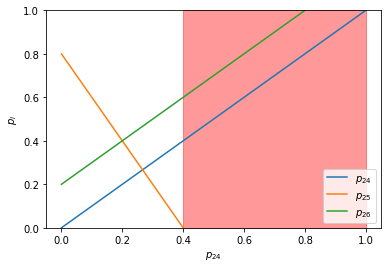

In [72]:
# find the range of validity for p24
p24 = np.linspace(0,1,1000)
p25 = 0.8 - 2 * p24
p26 = 0.2 + p24

# plot
plt.plot(p24, p24, label="$p_{24}$")
plt.plot(p24, p25, label="$p_{25}$")
plt.plot(p24, p26, label="$p_{26}$")
plt.legend()
plt.xlabel("$p_{24}$")
plt.ylabel("$p_i$")
plt.fill_betweenx((0,1),0.4,1, color="r", alpha=0.4)
plt.ylim(0,1);

From the plot, we see that valid choices of $p_{24}$ span from 0 to $0.4$. Above this, we get un-physical values of $p_{25}$. Now write out the entropy of the system $P(p_i)$ as in the lecture slides, with the constraint that $\sum_P P(p) = 1$:

$$
dS = \lambda dC = \sum(-ln(P_i) - 1 - \lambda)dP_i = 0
$$

which produces:

$$
P = e^{-(1 + \lambda)}
$$

A uniform prior in $P(p_{24},p_{25})$.

**B.** In a mass spectrometer we measure the weights of 20 atoms from the sample. We get these numbers:

Mg-24: 12

Mg-25: 3

Mg-26: 5

Using your maximum entropy PDF from part A as your prior, derive the posterior PDF for the parameter $p_1$, given this data (marginalizing over other parameters).

The likelihood of these measurements is given by:

$$
L = p_{24}^{12}\cdot p_{25}^3\cdot p_{26}^5
$$

With a flat prior, $P(p) \propto L$ Marginalize over $p_{25}$ and $p_{26}$

$$
P(p_{24}) = \iint p_{24}^{12}\cdot p_{25}^3\cdot p_{26}^5 dp_{26}dp_{25}
$$

$$
P(p_{24}) = p_{24}\frac{p_{25}^4}{4}\frac{p_{26}^6}{6}
$$


re-cast in terms of $p_{24}$ using equations (1) and (2):

$$
L = \frac{1}{24}p_{24}^{12} \cdot (0.8 - 2p_{24})^4 \cdot (0.2 + p_{24})^6
$$

Compute the normalization term and plot:

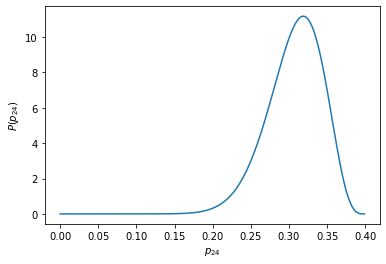

In [236]:
step = 0.001
p24 = np.arange(0,0.4,step)

L24 = (p24 ** 12 * (0.8 - 2 * p24) ** 4 * (0.2 + p24) ** 6) / 24 

norm = np.sum(L24) * step
P24 = L24 / norm

plt.plot(p24, P24)
plt.xlabel("$p_{24}$")
plt.ylabel("$P(p_{24})$");

**C.** If the data were instead

Mg-24: 12

Mg-25: 7

Mg-26: 1

What do you get the posterior distribution for $p_1$? Interpret your answer---that is, if you get the same result as in B, argue why this makes sense. If you get a different result, explain why the differing amounts of Mg-25 and Mg-26 in your data sample change your inference about Mg-24.

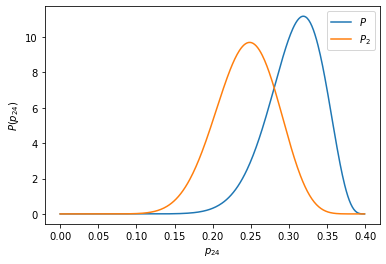

In [243]:
# repeat the same analysis
L2 = p24 ** 12 * (0.8 - 2 * p24) ** 8 * (0.2 + p24) ** 2 / 16
norm = sum(L2) * step
P24_2 = L2 / norm

plt.plot(p24, P24, label="$P$")
plt.plot(p24, P24_2, label="$P_2$")
plt.legend()
plt.xlabel("$p_{24}$")
plt.ylabel("$P(p_{24})$");

*The dimensions of the problem are such that any measurement of one of the species completely determines the other two. This means that measurements of $p_2$ and $p_3$ are effectively repeated measurements of $p_1$ (see eq(1) and eq(2) above).*

 <div class="page-break"></div>

### Question 5

A Jeffreys' prior is a method for assigning a non-informative prior that is designed to be invariant under choice of parametrization. Jeffreys proposed the following prior:

$$
g(\Theta) \propto \sqrt{I(\Theta)}
$$

where $I(\Theta)$ is the Fisher information, which is related to the likelihood function $L(x|\Theta)$ by:

$$
I(\Theta) = \langle\left[\frac{\partial }{\partial\Theta}lnL(x|\Theta)\right]^2\rangle
$$

Here the angle brackets mean to take the average over outcomes, with $\Theta$ taken to be fixed inside the integral:

$$
I(\Theta) = \int dx \cdot L(x|\Theta)\left[\frac{\partial }{\partial\Theta}lnL(x|\Theta)\right]^2
$$

**A.** Consider a measurement in which we flip a single coin once, and want to estimate the probability $p$ for the coin coming up heads. Derive the Jeffreys prior $g(p)$ in this case.

---

The likelihood function for a coin flip is a binomial for $N$ flips, $n$ heads, and probability $p$ of heads, so we write:

$$
L(n|p) = p^n(1-p)^{N-n}\frac{N!}{n!(N-n)!}
$$

$$
ln(L(n|p) = n\cdot ln(p) + (N-n)ln(1-p) + ln\left(\frac{N!}{n!(N-n)!}\right)
$$

$$
\frac{dln(L)}{dp} = \frac{n}{p} - \frac{N-n}{1-p}
$$

Replace the integral with a sum of $n$ over integers $0..N$. The Fisher Information is then given by:

$$
I(p) = \sum_{n=0}^N \left(p^n(1-p)^{N-n}\frac{N!}{n!(N-n)!}\right)\cdot\left[\frac{n}{p} - \frac{N-n}{1-p}\right]^2
$$

For a single coin flip ($N=1$), this simplifies to:



$$
I(p) = \frac{1}{p} + \frac{1}{1 - p}
$$

$$
\boxed{g(p) \propto \left[\frac{1}{p} + \frac{1}{1 - p}\right]^{1/2}}
$$

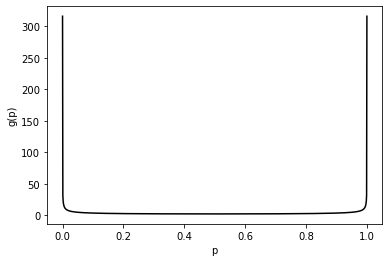

In [11]:
# plot the prior gp
p = np.linspace(1e-5,0.99999,1000)
gp = (1 / p + 1 / (1-p)) ** 0.5
plt.plot(p, gp, "k")
plt.xlabel("p")
plt.ylabel("g(p)");

*This makes sense. A single coin flip is going to heavily bias our belief about our coin to either $p(h)=1$ or $p(h)=0$, as 100\% of our information will go one way or the other (assuming we know nothing else about the nature of coins).*

**B.** Suppose that you start with this prior, then flip the coin three times, yielding three heads. What is the probability that $p<0.5$?

Likelihood function for 3 heads in 3 flips:


$$
L(3|p) = p^3(1-p)^{3-3}\frac{3!}{3!(3-3)!} = p^3
$$

Write out Bayes' theorem:

$$
P(p) = \frac{g(p)p^3}{\int^1_0g(p)p^3dp} = \frac{16}{5\pi}\cdot g(p)p^3
$$

Integrate from 0 to 0.5:

$$
P(0 < p < 0.5) = \int_0^{0.5} \frac{16}{5\pi}\cdot g(p)p^3 dp = \boxed{0.033}
$$

**C.** Suppose that some model relates $p$ to another parameter $\psi$ according to $p=\psi^4$. Derive the Jeffreys prior for $\psi$, starting with the likelihood for a single coin flip expressed as a function of $\psi$.

Substitute:

$$
p = \psi^4
$$

Calculate likelihood:

$$
L(n|\psi) = \psi^{4n}(1 - \psi^4)^{N-n}\frac{N!}{n!(N-n)!}
$$

Take the log:

$$
ln(L(n|\psi) = 4nln(\psi) + (N-n)ln(1-\psi^4) + ln\left(\frac{N!}{n!(N-n)!}\right)
$$

Differentiate wrt $\psi$:

$$
\frac{dln(L)}{d\psi} = \frac{4n}{\psi} - \frac{(N-n)}{(1-\psi^4)}4\psi^3
$$

Fisher information:

$$
I(\psi) = \sum^N_{n=0}\psi^{4n}(1 - \psi^4)^{N-n}\frac{N!}{n!(N-n)!}\left[\frac{4n}{\psi} - \frac{(N-n)}{(1-\psi^4)}4\psi^3\right]^2
$$

$$
I(\psi) = (1-\psi^4)\left[\frac{4\psi^3}{1-\psi^4}\right]^2 + \psi^4\left[\frac{4}{\psi}\right]^2
$$

$$
= 16\left(\frac{\psi^6}{1-\psi^4} + \psi^2\right)\frac{\psi^{-6}}{\psi^{-6}}
$$

$$
I(\psi) = 16\psi^6\left(\frac{1}{1-\psi^4} + \frac{1}{\psi^4}\right)
$$

so the Jeffreys prior for $\psi$ is

$$
\boxed{g(\psi) \propto 4\psi^3\left[\frac{1}{1-\psi^4} + \frac{1}{\psi^4}\right]^{1/2}}
$$

**D.** Demonstrate explicitly that if you take the Jeffreys prior for $\psi$ from Part C and do a change of variables to $p$, you get back the Jeffreys prior for $p$ that you found in part A. This will confirm that Jeffreys' procedure for generating priors encodes the same information for both of these parametrizations.

$$
p = \psi^4
$$

$$
f(p) = f(\psi)\frac{dp}{d\psi}
$$

$$
\frac{dp}{d\psi} = 4\psi^3
$$

$$
f(p) = 4\psi^3f(\psi)
$$

$$
\left[\frac{1}{p} + \frac{1}{1 - p}\right]^{1/2} = 4\psi^3\left[\frac{1}{1-\psi^4} + \frac{1}{\psi^4}\right]^{1/2}_\square
$$

**E.** Finally, show that if you started with a uniform prior for $p$ and a uniform prior for $\psi$, then these priors are actually different after converting from one parametrization to another with a change of variables. Thus a uniform prior is not a Jeffreys prior for this problem.

Uniform prior on [0,1] = 1, so write:

$$
g(p) = 1
$$

$$
g(\psi) = 1
$$

Set them equal, do the change of variables and prove by contradiction:

$$
g(p) = g(\psi)\frac{dp}{d\psi}
$$

$$
1 \neq 1\cdot4(1^3)_\square
$$
